# Lab Assignment Three: Extending Logistic Regression

# Team Member Information:

In [1]:
import pandas as pd
names = ['Jiaqi Song','Yuchao Zhang','Zhenxuan Ouyang','Jianmin Li']
smuid = [47534426, 47787029, 47784546, 47794972]
teaminfo = pd.DataFrame()
teaminfo['name'] = names
teaminfo['smu id'] = smuid
teaminfo

,name,smu id
0,Jiaqi Song,47534426
1,Yuchao Zhang,47787029
2,Zhenxuan Ouyang,47784546
3,Jianmin Li,47794972


# 1. Preparation and Overview (30 points total)

##  1.1 Business Understanding

#### [20 points] Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the classification task is and what parties would be interested in the results. For example, would the model be deployed or use mostly for offline analysis? 

Nowadays mobile phones has become a necessary in almost everyone's life. With the development of technology, mobile has more and more functions. On the market, the price of mobile varies widely depending on what features the phone has, such as RAM, Internal Memory, battery life, camera pixels etc. Suppose there is a new mobile company which has its own mobile phone created. The new phone may have various features, some features may be better than most phones on the market, while some features may be not that good compared with other mobile phone. Given this, how to find out the proper price range is an urgent task for the manager. To solve this problem, the manager asked the marketing department to collect sales data of mobile phones of various companies. However, the manager is not so good at machine learning, he does not know how to estimate price of mobiles their company creates given the collected data. Our objective is to use the collected data to help the company predict its selling price range given the fetures of its mobile phone. The company can also use the model to adjust the price of its mobile since the prices on the market may change frequently.

## 1.2 Data Preprocessing

#### [5 points] (mostly the same processes as from previous labs) Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [2]:
import pandas as pd
import numpy as np
from scipy.special import expit
df = pd.read_csv('train.csv')
# The dataset has 2000 instances and 21 features
display(df.shape)

(2000, 21)

In [3]:
# Check the first 5 rows of the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# describe the data summary
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# describe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [6]:
# Create a description table
df_describe = pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Features'] = df.columns
df_describe['Data_Type'] = ['Integer', 'Integer','float','Integer','Integer','Integer','Integer','float','Integer','Integer','Integer','Integer','Integer',
                            'Integer','Integer','Integer','Integer','Integer','Integer','Integer','Integer']
df_describe['Description'] = [' total energy a battery can store in one time measured in mAh', 'has bluetooth or not', 'Speed at which microprocessor executes instructions ',
                             'has dual sim support or not', 'front Camera mega pixels', 'has 4G or not', 'internal memory in gigabytes','mobile depth in cm','weight of mobile phone',
                              'number of cores of processor','primary camera mega pixels','pixel resolution height','pixel resolution width','random access memory in mega bytes', 'screen height of mobile in cm','screen width of mobile in cm',
                              'longest time that a single battery charge will last when you are on a call in hours','has 3G or not','has touch screen or not','has wifi or not','price range (0: low cost, 1: medium cost, 2: high cost, 3: very high cost)']
df_describe

,Features,Data_Type,Description
0,battery_power,Integer,total energy a battery can store in one time measured in mAh
1,blue,Integer,has bluetooth or not
2,clock_speed,float,Speed at which microprocessor executes instructions
3,dual_sim,Integer,has dual sim support or not
4,fc,Integer,front Camera mega pixels
5,four_g,Integer,has 4G or not
6,int_memory,Integer,internal memory in gigabytes
7,m_dep,float,mobile depth in cm
8,mobile_wt,Integer,weight of mobile phone
9,n_cores,Integer,number of cores of processor


In [7]:
# check if there are duplicated data
idx = df.duplicated()
print('The number of duplicated data: ' + str(len(df[idx])))

The number of duplicated data: 0


In [8]:
# use the missingno to directly find if there is any missing data
import missingno as mn
mn.matrix(df)

In [9]:
# Set our target as the 'charges'
target = df['price_range']
target_names='price_range'
y = target.values
# Delete the column of target from our table
df = df.drop("price_range",axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler

X = df.values
X = StandardScaler().fit(X).transform(X)
y_not_binary = y

print(X.shape)
print(y_not_binary.shape)

(2000, 20)
(2000,)


## 1.3 Dividing Data

#### [5 points] Divide you data into training and testing data using an 80% training and 20% testing split. Use the cross validation modules that are part of scikit-learn. Argue "for" or "against" splitting your data using an 80/20 split. That is, why is the 80/20 split appropriate (or not) for your dataset?  

In [11]:
from sklearn.model_selection import ShuffleSplit
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [12]:
from sklearn.linear_model import LinearRegression
# run logistic regression and vary some parameters
from sklearn import metrics as mt

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train_std = X[train_indices]
    y_train = y[train_indices]
    
    X_test_std = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    reg = LinearRegression().fit(X_train_std, y_train) # train object
    y_hat = reg.predict(X_test_std) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = float(sum(y_hat==y_test))/len(y_test)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.0
====Iteration 1  ====
accuracy 0.0
====Iteration 2  ====
accuracy 0.0


Normally, splitting data is a technique that specifically is used to estimate out-of-sample error; i.e. how well will your model predict new outcomes using a new dataset? The more training data you have, the better your model will be. The more testing data you have, the less variance you can expect in your results (ie. accuracy, false positive rate, etc.). The 80:20 and 90:10 splits are popular. In my opinion, it all depends on how much data you have at hand. It also depends on how much data you expect to be sufficient to accurately train your model. If you only have 100 examples and you are training a data intensive model, then a 90:10 split is probably better. However, in our case, we have 2000 instances, we think that 80:20 is better, since we can expect less variace in our results compared with 90:10 split. Also, there is no inherent relationships like time series data, so we can choose 80% of the data randomly as the training set, the other 20% as the testing set.

# 2. Modeling (50 points total)
#### The implementation of logistic regression must be written only from the examples given to you by the instructor. No credit will be assigned to teams that copy implementations from another source, regardless of if the code is properly cited. 

## 2.1 Implementation of Logistic Regression Classifier
#### [20 points] Create a custom, one-versus-all logistic regression classifier using numpy and scipy to optimize. Use object oriented conventions identical to scikit-learn. You should start with the template developed by the instructor in the course. You should add the following functionality to the logistic regression classifier:
#### - Ability to choose optimization technique when class is instantiated: either steepest descent, stochastic gradient descent, or Newton's method. 
#### - Update the gradient calculation to include a customizable regularization term (either using no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization). Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated.  

### 2.1.1 Logistic Regression - Binary

In [13]:
%%time
# from last time, our logistic regression algorithm is given by (including everything we previously had):
from scipy.optimize import fmin_bfgs
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001, penalty=None, solver='sd'):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.penalty = penalty
        self.solver = solver
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        if not self.solver or self.solver == 'sd':
            ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
            gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        if self.solver == 'sgd':
            idx = int(np.random.rand()*len(y)) # grab random instance
            ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
            gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
            
        
        gradient = gradient.reshape(self.w_.shape)
        if self.penalty == 'l2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        if self.penalty == 'l1':
            gradient[1:] += np.sign(self.w_[1:]) * self.C
        if self.penalty == 'l12':
            gradient[1:] += -2 * self.w_[1:] * self.C - np.sign(self.w_[1:]) * self.C
        
        return gradient

    
    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*sum(w**2) #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))


    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        if self.solver == 'sd' or self.solver == 'sgd':
            self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

                # for as many as the max iterations
            for _ in range(self.iters):
                gradient = self._get_gradient(Xb,y)
                self.w_ += gradient*self.eta # multiply by learning rate 

        if self.solver == 'bfgs':
            self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
            self.w_ = self.w_.reshape((num_features,1))

Wall time: 0 ns


In class BinaryLogisticRegression, we add parameter "penalty" representing scheme of regularization. In parameter "penalty", "l1" represents L1 regularization, "l2" represents L2 regularization and "l12" represents both L1 and L2 regularization. We also add parameter "solver". In parameter "solver", "sd" represents Steepest Gradient Descent Optimazation, "sgd" represents Stomastic Gradient Descent Optimazation and "bfgs" represents BFGS Optimazation.

In function "self._get_gradient(self,X,y)", we added if statement to determine which scheme of regularization is being used. Then we regularize the gradient according to parameter "penalty". In function "def fit(self, X, y):", we added if statement to determine which scheme of optimazation is being used. Then we optimize the weights according to parameter "solver".

### 2.1.2 Logistic Regression - Multiple

In [14]:
class LogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001, penalty=None, solver='sd'):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.penalty = penalty
        self.solver = solver
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = BinaryLogisticRegression(self.eta,self.iters, self.C, self.penalty, self.solver)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):

        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row
    

After we finished the BinaryLogisticRegression Class, we extends the binary logistic regression class to multi class logistic regression class.

## 2.2 Training Classifier

#### [15 points] Train your classifier to achieve good generalization performance. That is, adjust the optimization technique and the value of the regularization term "C" to achieve the best performance on your test set. Visualize the performance of the classifier versus the parameters you investigated. Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters?

We think there is some "data snooping" involed in my method of selecting data, but it's ok because we use cross validation for selecting the train data of dataset. This time, we select different iterations, the value of C and the value of eta to get different accuracy and try to get the highest one. Besides, we don't have a detailed check of our data so we have no idea how it distributes. Therefore, I think we don't have a serious problem of "data snooping".

In [15]:
num_cv_iterations = 3
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size  = 0.2)

iter_num=0
for train_indices, test_indices in cv_object.split(X,y): 
    X_train_std = X[train_indices]
    y_train = y[train_indices]
    X_test_std = X[test_indices]
    y_test = y[test_indices]

### C vs Accuracy and Optimation vs Accuracy

### 2.1.1 Using Steepest Gradient Descent with different schemes of Regularization and values of C

In [16]:
from sklearn.metrics import accuracy_score

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in multiply
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in add
No handles with labels found to put in legend.


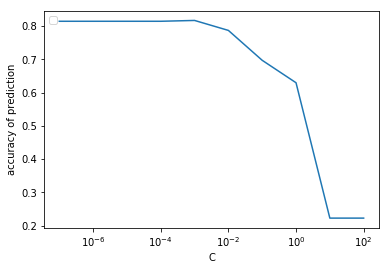

In [17]:
import matplotlib.pyplot as plt
# Compare the performance of "Steepest Descent" with "L2 Regularization"
accuracy, params = [], []
for c in np.arange(-7, 3):
    lr = LogisticRegression(eta=0.1, iterations=1000, penalty='l2', C=10.**c, solver='sd')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

From the graph for Steepest Descent with L2 regularization above, we can see that when C is about 0.001, the accuracy is around 81% and will be decreasing when the value C is large than 0.001, which means '0.001' is like a break point of the value of C.

No handles with labels found to put in legend.


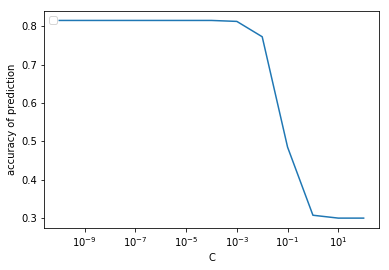

In [18]:
import matplotlib.pyplot as plt
# Compare the performance of "Steepest Descent" with "L1 Regularization"
accuracy, params = [], []
for c in np.arange(-10, 3):
    lr = LogisticRegression(eta=0.1, iterations=1000, penalty='l1', C=10.**c, solver='sd')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

From the graph for Steepest Descent with L1 regularization above, like Steepest Descent with L2 regularization, we can see that when C is about 0.001, the accuracy is around 81% and will be decreasing when the value C is large than 0.001 when using both L1 regularization.

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in multiply
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sign
No handles with labels found to put in legend.


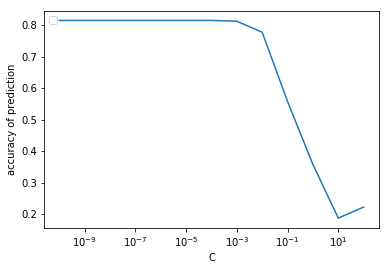

In [19]:
accuracy, params = [], []
for c in np.arange(-10, 3):
    lr = LogisticRegression(eta=0.1, iterations=1000, penalty='l12', C=10.**c, solver='sd')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

From the graph for Steepest Descent with both L1 & L2 regularization above, we can see that when C is about 0.001, the accuracy is around 81% and will be decreasing when the value C is large than 0.001 when using both L1 & L2 regularization.

### 2.1.2 Using Stomastic Gradient Descent with different schemes of Regularization and values of C

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in multiply
No handles with labels found to put in legend.


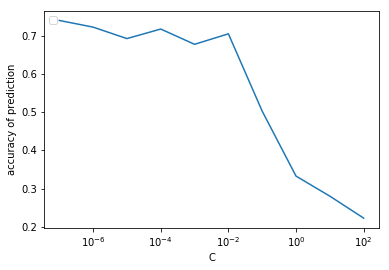

In [20]:
# Compare the performance of "Stochastic Gradient Descent" with "L2 Regularization"
accuracy, params = [], []
for c in np.arange(-7, 3):
    lr = LogisticRegression(eta=0.1, iterations=1000, penalty='l2', C=10.**c, solver='sgd')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

No handles with labels found to put in legend.


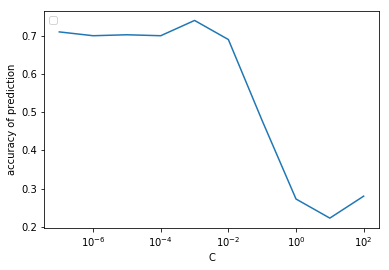

In [21]:
import matplotlib.pyplot as plt
accuracy, params = [], []
for c in np.arange(-7, 3):
    lr = LogisticRegression(eta=0.1, iterations=1000, penalty='l1', C=10.**c, solver='sgd')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in multiply
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sign
No handles with labels found to put in legend.


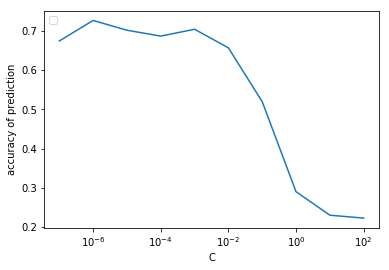

In [22]:
accuracy, params = [], []
for c in np.arange(-7, 3):
    lr = LogisticRegression(eta=0.1, iterations=1000, penalty='l12', C=10.**c, solver='sgd')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

For the Stochastic Gradient Descent with different regularization, the accuracy is not stable. From the three graphs above, we can get that the overall upper bound of accuracy is about 73%.

### 2.1.3 Using BFGS with different schemes of Regularization and values of C

No handles with labels found to put in legend.


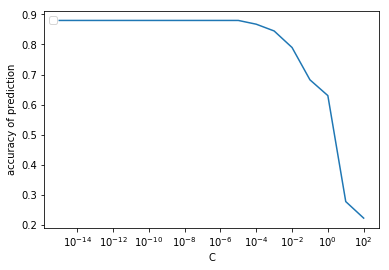

In [23]:
import matplotlib.pyplot as plt
accuracy, params = [], []
for c in np.arange(-15, 3):
    lr = LogisticRegression(eta=0.1, iterations=20, penalty='l2', C=10.**c, solver='bfgs')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

No handles with labels found to put in legend.


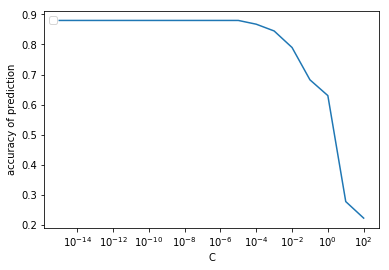

In [24]:
accuracy, params = [], []
for c in np.arange(-15, 3):
    lr = LogisticRegression(eta=0.1, iterations=20, penalty='l1', C=10.**c, solver='bfgs')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

No handles with labels found to put in legend.


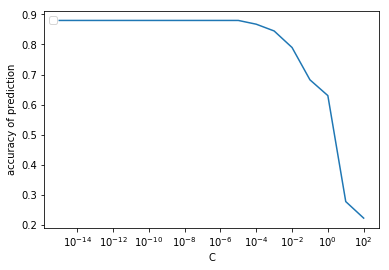

In [25]:
accuracy, params = [], []
for c in np.arange(-15, 3):
    lr = LogisticRegression(eta=0.1, iterations=20, penalty='l12', C=10.**c, solver='bfgs')
    lr.fit(X_train_std, y_train)
    yhat = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

From the graph above that shows the relationship between C and accuracy of BFGS optimization with different schemes of regularization, we can see that BFGS optimization performs the best compared to the Steepest Gradient Descent and Stochastic Gradient Descent. Its overall accuracy reached to about 90% with the value of C is less than (10 ** -3). And BFGS optimization only used 20 iterations compared to 1000 iterations used by Steepest Gradient Descent and Stochastic Gradient Descent.

In [26]:
lr = LogisticRegression(eta=0.1, iterations=20, penalty='l2', C=0.00001, solver='bfgs')
lr.fit(X_train_std, y_train)
print(lr)

yhat = lr.predict(X_test_std)
print('Accuracy of: %.3f' % accuracy_score(y_test, yhat))

MultiClass Logistic Regression Object with coefficients:
[[-2.63937982e+01 -7.70081281e+00  1.04555885e-01  4.03967851e-01
   9.60725997e-02 -3.73449500e-01 -1.65730832e-02 -2.01510272e-01
  -4.00381832e-01  1.08215238e+00  2.73846396e-01 -5.69033052e-02
  -5.05087896e+00 -4.25539398e+00 -3.05290279e+01  1.26558858e-01
   2.08187831e-01  2.22439194e-01  3.83274491e-01  2.92276923e-01
   7.09200730e-01]
 [-1.16554877e+00  2.36507169e-04  6.67943940e-04 -5.00444834e-02
   7.22492917e-02  5.63482872e-02 -3.83010533e-04 -6.55606232e-03
   1.32399170e-01 -9.93578930e-03 -1.93402940e-01  2.14558717e-02
   7.50238907e-02 -7.96682653e-02 -5.66183982e-01 -3.81075007e-03
  -6.18055330e-02  5.22083104e-02 -1.17404704e-02  6.13830406e-02
   1.99668108e-02]
 [-1.21685799e+00 -1.90694965e-02 -4.68659037e-02  1.06469624e-02
  -7.71087808e-02  8.68765387e-02 -5.34274563e-02 -7.94408393e-02
  -4.82152946e-02  1.29632271e-01  1.23394906e-01  2.50019883e-03
   4.53003546e-02 -2.61332762e-02  6.35407646e-

From the visualzations above, we can see different schemes of regularization performs similar prediction accuracy, so we choose l2 as regularization here. And we can see BFGS optimazation with value of C is less than (10 ** -3) will perform the best compared to Steepest Gradient Descent and Stochastic Gradient Descent optimazation. So we choose BFGS asoptimazation here.

### Testing ends

## 2.3 Comparison Between Sklearn Learn and Our Own Implementation

#### [15 points] Compare the performance of your "best" logistic regression optimization procedure to the procedure used in scikit-learn. Visualize the performance differences in terms of training time and classification performance. Discuss the results. 

In [27]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

lr_sk = SKLogisticRegression(max_iter=150, penalty='l2', solver='lbfgs', C=1000) # all params default

lr_sk.fit(X_train_std, y_train)
yhat = lr_sk.predict(X_test_std)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.8825


F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
No handles with labels found to put in legend.


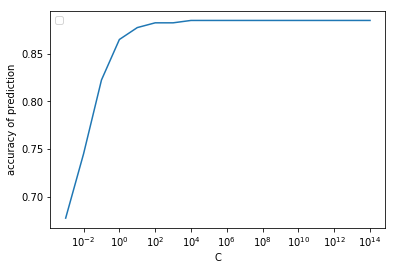

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

accuracy, params = [], []
for c in np.arange(-3, 15):
    lr_sk = SKLogisticRegression(max_iter=150, penalty='l2', C=10. ** c, solver='lbfgs')
    lr_sk.fit(X_train_std, y_train)
    yhat = lr_sk.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, yhat))
    params.append(10.**c)
accuracy = np.array(accuracy)
plt.plot(params, accuracy)
plt.ylabel('accuracy of prediction')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

From above visualization of performance of sklearn implementation, we can see its performance is slightly higher than our own implementation. But there is one difference, in our own implementation, the lower the C is, the higher the accuracy is. Whereas in sklearn, the higher C is, the higher the accuracy is. That's because in sklearn, the C is the reciprocal of the C in our own implementation.

In [29]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

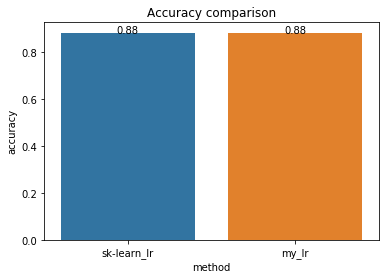

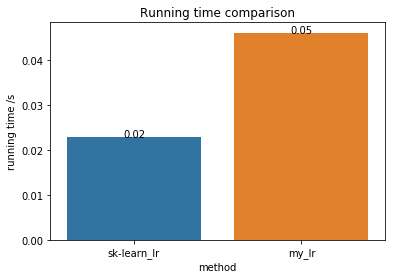

In [32]:
import time
import seaborn as sns
# how do we compare now to sklearn?

running_time = []
# record the running time
start_sk = time.time()

# Use sklearn-traning
lr_sk = SKLogisticRegression(max_iter=150, penalty='l2', solver='lbfgs', C=1000, n_jobs=1) 
lr_sk.fit(X_train_std,y_train)
end_sk = time.time()
running_time.append(end_sk-start_sk)

yhat_sk = lr_sk.predict(X_test_std)


#########################################################################################################
start_my = time.time()
lr_bfgs = LogisticRegression(eta=0.1, iterations=20, penalty='l2', C=0.00001, solver='bfgs')
lr_bfgs.fit(X_train_std, y_train)
end_my = time.time()
running_time.append(end_my-start_my)

yhat_lr = lr_bfgs.predict(X_test_std)
accuracy_bfgs = [accuracy_score(y_test,yhat_sk), accuracy_score(y_test,yhat_lr)]
method_list = ['sk-learn_lr', 'my_lr']

# plt.figure(figsize=(10,10))
fig, ax = plt.subplots(1, 1)

plt.title('Accuracy comparison')
plt.xlabel('method')
plt.ylabel('accuracy')
ax = sns.barplot(x=method_list, y=accuracy_bfgs)
show_values_on_bars(ax)


fig, ax = plt.subplots(1, 1)
plt.title('Running time comparison')
plt.xlabel('method')
plt.ylabel('running time /s')
ax = sns.barplot(x=method_list, y=running_time)
show_values_on_bars(ax)

We visualized the difference of accuracy and running time between using Sklearn implementation and our owen implementation. From visualizations we can see, the accuracy using Sklearn is slightly higher than accuracy using our own implementation. And the running time using Sklearn is obviously faster than our own implementation, which is about only one thild of running time of our own implementation.

# 3. Deployment (10 points total)

#### Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party)? Why?

We will recommand you to use scikit-learn.

According to the above, with the relative same accuracy, the scikit-learn has a faster speed. One of the important reason is that the scikit-learn does all the work on the native language compiled by Cython.

Additionally, the scikit-learn provides more parameters to choose. So, it can achieve more demands. Our codes only provides several basic parameters.

Last but not least, the scikit-learn has been used on many datasets to prove it is effective. However, we only use our code on one dataset, and there are many parameters are optimized for this dataset. So, we don't know whether it still has a relatively excellent performance on other datasets.

# 4. Exceptional Work (10 points total)

#### You have free reign to provide additional analyses. One idea: Update the code to use either "one-versus-all" or "one-versus-one" extensions of binary to multi-class classification. 
#### One idea (required for 7000 level students): Implement an optimization technique for logistic regression using mean square error as your objective function (instead of binary entropy). Your solution should be able to solve the binary logistic regression problem in one gradient update step. 

## MSE Binary Logistic Regression

In the picture above, we use mean square error as the new objective functive, and we take the derivative of the new objective functive and use that as the new gradient. According to the derivative in the picture, now we update the gradient function to "gradient = (np.mean(X * (ydiff * g * (1-g))[:,np.newaxis], axis=0)) * 2".

In [33]:
%%time
# from last time, our logistic regression algorithm is given by (including everything we previously had):
from numpy.linalg import pinv
class MSEBinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MSE Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
#         ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
#         gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
#         gradient = gradient.reshape(self.w_.shape)
#         gradient = gradient * 2
        
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = (np.mean(X * (ydiff * g * (1-g))[:,np.newaxis], axis=0)) * 2 # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

            # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient * self.eta # multiply by learning rate 

Wall time: 0 ns


First we update the new gradient function in "def _get_gradient(self,X,y)". Besides, in order to be able to solve the binary logistic regression problem in one gradient update step, we used Newton's Update Method. 

In [35]:
df = pd.read_csv('train.csv')
X = df.iloc[:, :20].values
y = (df.iloc[:, 20]>1).astype(np.int).values

In [36]:
from sklearn.model_selection import train_test_split

stdsc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

We load the data, but this time we convert the the target feature from multi-targets to binary-targets. And we split the data into 80%-20% and then we stardardize the data. Now we test our new binary classifier.

In [39]:
blr = MSEBinaryLogisticRegression(eta=0.1, iterations=1, C=0.001)

blr.fit(X_train_std, y_train)
print(blr)

yhat = blr.predict(X_test_std)
print('Accuracy of: %.3f' % accuracy_score(y_test, yhat))

MSE Binary Logistic Regression Object with coefficients:
[[ 3.28300039e-10]
 [ 9.54870492e-06]
 [-9.79117866e-07]
 [ 6.77466847e-07]
 [-1.56479391e-06]
 [ 7.16789446e-07]
 [-5.10625326e-07]
 [-4.67875387e-07]
 [-1.69556830e-06]
 [-6.39074263e-07]
 [ 2.08380758e-06]
 [-1.07033214e-06]
 [ 4.65273057e-06]
 [ 4.83228716e-06]
 [ 5.15013590e-05]
 [-8.13962459e-07]
 [ 4.68905171e-07]
 [-7.62539370e-07]
 [ 7.69859975e-07]
 [-8.65679448e-07]
 [-2.22662809e-07]]
Accuracy of: 0.950


As we can see, using mean square error as our objective function, we only use one iteration and the prediction accuracy is 95%, which means this classifier could solve the binary logistic regression problem in one update step and it performs well. 